<a href="https://colab.research.google.com/github/andrejuniorba/SQL/blob/main/Python_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SQL com Python**


In [198]:
#from google.colab import drive
#drive.mount('/content/drive')

# Importante

Para criar comentários no SQL:

--comentário

# Import da biblioteca

In [199]:
import sqlite3

# Criar um Banco de Dados

In [200]:
#Criando o BD
conexao = sqlite3.connect('Banco_Dados')

In [201]:
#Apontando (toda vez que for fazer qualquer procedimento no BD vou chamar a variável criada)
cursor = conexao.cursor()

# Criar uma tabela

CREATE TABLE nome (coluna1 datatype, coluna2 datatype, ...)

In [202]:
#Criando a tabela 
cursor.execute(
    '''
    
    CREATE TABLE Minha_Tabela (Data text, Nome text, Idade real)
    '''
)

#Fazer um commit
conexao.commit()

# Inserir valor na tabela

INSERT INTO nome VALUES (coluna1, coluna2, ...)

In [203]:
#Inserindo valores
cursor.execute(
    'INSERT INTO Minha_Tabela VALUES ("01/01/2022", "André", "40")'
)

In [204]:
#Inserindo mais um
cursor.execute(
    'INSERT INTO Minha_Tabela VALUES ("05/01/2022", "Rosana", "37")'
)

In [205]:
cursor.execute(
    'INSERT INTO Minha_Tabela VALUES ("06/01/2022", "Ana", "10")'
)

cursor.execute(
    'INSERT INTO Minha_Tabela VALUES ("06/01/2022", "Antônia", "16")'
)

cursor.execute(
    'INSERT INTO Minha_Tabela VALUES ("08/01/2022", "Ana", "42")'
)

cursor.execute(
    'INSERT INTO Minha_Tabela VALUES ("06/01/2022", "Ana", "25")'
)

# Selecionar Tabela

SELECT*FROM nome 

SELECT coluna1, coluna2, ..., FROM nome

In [206]:
# Consultar tudo
consulta = cursor.execute(
    'SELECT*FROM Minha_Tabela'
).fetchall()

print(consulta)

[('01/01/2022', 'André', 40.0), ('05/01/2022', 'Rosana', 37.0), ('06/01/2022', 'Ana', 10.0), ('06/01/2022', 'Antônia', 16.0), ('08/01/2022', 'Ana', 42.0), ('06/01/2022', 'Ana', 25.0)]


In [207]:
# Consulta específica
consulta_especifica = cursor.execute(
    '''
    --Consulta específica
    SELECT Nome, Idade FROM Minha_Tabela
    '''
).fetchall()

print(consulta_especifica )

[('André', 40.0), ('Rosana', 37.0), ('Ana', 10.0), ('Antônia', 16.0), ('Ana', 42.0), ('Ana', 25.0)]


In [208]:
for linha in consulta_especifica:
  print(linha)

('André', 40.0)
('Rosana', 37.0)
('Ana', 10.0)
('Antônia', 16.0)
('Ana', 42.0)
('Ana', 25.0)


# Filtar registros

SELECT coluna FROM nome WHERE condição

* Igual =

* Maior >

* Menor <

* Maior ou igual >=

* Menor ou igual <=

* Diferente <>

* Entre BETWEEN

* Procurar por padrão LIKE

* Especificar vários valores possíveis para uma coluna IN

In [209]:
filtro_igual = cursor.execute(
    'SELECT*FROM Minha_Tabela WHERE Nome = "Rosana"'
).fetchall()

print(filtro_igual)

[('05/01/2022', 'Rosana', 37.0)]


In [210]:
filtro_maior = cursor.execute(
    'SELECT*FROM Minha_Tabela WHERE Idade < 40'
).fetchall()

print(filtro_maior)

[('05/01/2022', 'Rosana', 37.0), ('06/01/2022', 'Ana', 10.0), ('06/01/2022', 'Antônia', 16.0), ('06/01/2022', 'Ana', 25.0)]


**BETWEEN (entre)**

In [211]:
filtro_entre = cursor.execute(
    'SELECT*FROM Minha_Tabela WHERE Idade BETWEEN 15 AND 38'
).fetchall()

print(filtro_entre)

[('05/01/2022', 'Rosana', 37.0), ('06/01/2022', 'Antônia', 16.0), ('06/01/2022', 'Ana', 25.0)]


**LIKE (procurar padrão)**

SELECT*FROM nome WHERE coluna LIKE 'instrução'

* % representa zero, um ou vários caracteres

* _ representa um único caractere

In [212]:
filtro_like = cursor.execute(
    'SELECT*FROM Minha_Tabela WHERE Nome LIKE "%a"'
).fetchall()

print(filtro_like)

[('05/01/2022', 'Rosana', 37.0), ('06/01/2022', 'Ana', 10.0), ('06/01/2022', 'Antônia', 16.0), ('08/01/2022', 'Ana', 42.0), ('06/01/2022', 'Ana', 25.0)]


In [213]:
filtro_like1 = cursor.execute(
    'SELECT*FROM Minha_Tabela WHERE Nome LIKE "%é"'
).fetchall()

print(filtro_like1)

[('01/01/2022', 'André', 40.0)]


In [214]:
filtro_like2 = cursor.execute(
    'SELECT*FROM Minha_Tabela WHERE Nome LIKE "r%"'
).fetchall()

print(filtro_like2)

[('05/01/2022', 'Rosana', 37.0)]


**IN (procurar algo muito específico)**

SELECT*FROM nome WHERE coluna IN 

In [215]:
filtro_in = cursor.execute(
    'SELECT*FROM Minha_Tabela WHERE Idade IN (10, 37)'
).fetchall()

print(filtro_in)

[('05/01/2022', 'Rosana', 37.0), ('06/01/2022', 'Ana', 10.0)]


In [216]:
filtro_in2 = cursor.execute(
    'SELECT*FROM Minha_Tabela WHERE Nome IN ("Ana")'
).fetchall()

print(filtro_in2)

[('06/01/2022', 'Ana', 10.0), ('08/01/2022', 'Ana', 42.0), ('06/01/2022', 'Ana', 25.0)]


# AND, OR, NOT

* AND as duas condições são verdadeiras

* OR uma ou outra condição é verdadeira

* NOT condição não é verdadeira

In [217]:
filtro_and = cursor.execute(
    'SELECT*FROM Minha_Tabela WHERE Idade = 15 AND Nome = "Ana"'
).fetchall()

print(filtro_and )

[]


In [218]:
filtro_or = cursor.execute(
    'SELECT*FROM Minha_Tabela WHERE Idade = 15 OR Nome = "Rosana"'
).fetchall()

print(filtro_or)

[('05/01/2022', 'Rosana', 37.0)]


In [219]:
filtro_not = cursor.execute(
    'SELECT*FROM Minha_Tabela WHERE NOT Idade = 10'
).fetchall()

print(filtro_not)

[('01/01/2022', 'André', 40.0), ('05/01/2022', 'Rosana', 37.0), ('06/01/2022', 'Antônia', 16.0), ('08/01/2022', 'Ana', 42.0), ('06/01/2022', 'Ana', 25.0)]


# ORDER BY

SELECT*FROM nome ORDER BY coluna1,coluna2...

* Classifica o conjunto de resultados em ordem crescente

* Para classificar em ordem decrescente tem que inserir a palavra "DESC"

In [220]:
filtro_ordem = cursor.execute(
    'SELECT*FROM Minha_Tabela ORDER BY Idade'
).fetchall()

for linha in filtro_ordem:
  print(linha)

('06/01/2022', 'Ana', 10.0)
('06/01/2022', 'Antônia', 16.0)
('06/01/2022', 'Ana', 25.0)
('05/01/2022', 'Rosana', 37.0)
('01/01/2022', 'André', 40.0)
('08/01/2022', 'Ana', 42.0)


In [221]:
filtro_ordem = cursor.execute(
    'SELECT*FROM Minha_Tabela ORDER BY Idade DESC'
).fetchall()

for linha in filtro_ordem:
  print(linha)

('08/01/2022', 'Ana', 42.0)
('01/01/2022', 'André', 40.0)
('05/01/2022', 'Rosana', 37.0)
('06/01/2022', 'Ana', 25.0)
('06/01/2022', 'Antônia', 16.0)
('06/01/2022', 'Ana', 10.0)


# Valores nulos



In [222]:

cursor.execute('INSERT INTO Minha_Tabela VALUES ("Nome1", null, 30)')
cursor.execute('INSERT INTO Minha_Tabela VALUES ("Nome2", null, null)')

In [223]:
#verificar valores nulos
valor_nulo = cursor.execute(
    'SELECT*FROM Minha_Tabela WHERE Nome IS NULL'
).fetchall()

for linha in valor_nulo:
  print(valor_nulo)

[('Nome1', None, 30.0), ('Nome2', None, None)]
[('Nome1', None, 30.0), ('Nome2', None, None)]


In [224]:
#verificar valores não nulos
valor_nao_nulo = cursor.execute(
    'SELECT*FROM Minha_Tabela WHERE Nome IS NOT NULL'
).fetchall()

for linha in valor_nulo:
  print(valor_nao_nulo)

[('01/01/2022', 'André', 40.0), ('05/01/2022', 'Rosana', 37.0), ('06/01/2022', 'Ana', 10.0), ('06/01/2022', 'Antônia', 16.0), ('08/01/2022', 'Ana', 42.0), ('06/01/2022', 'Ana', 25.0)]
[('01/01/2022', 'André', 40.0), ('05/01/2022', 'Rosana', 37.0), ('06/01/2022', 'Ana', 10.0), ('06/01/2022', 'Antônia', 16.0), ('08/01/2022', 'Ana', 42.0), ('06/01/2022', 'Ana', 25.0)]


# Update

UPDATE nome SET coluna = "" WHERE coluna 'condição'

* Modificar registro existente em uma tabela.

In [225]:
valor_update = cursor.execute(
    'UPDATE Minha_Tabela SET Nome = "Preenchido" WHERE Nome IS NULL'
).fetchall()

In [226]:
tab_atualizada = cursor.execute(
    'SELECT*FROM Minha_Tabela'
).fetchall()

for linha in tab_atualizada:
  print(linha)

('01/01/2022', 'André', 40.0)
('05/01/2022', 'Rosana', 37.0)
('06/01/2022', 'Ana', 10.0)
('06/01/2022', 'Antônia', 16.0)
('08/01/2022', 'Ana', 42.0)
('06/01/2022', 'Ana', 25.0)
('Nome1', 'Preenchido', 30.0)
('Nome2', 'Preenchido', None)


In [227]:
valor_update = cursor.execute(
    'UPDATE Minha_Tabela SET Idade = 24 WHERE Idade IS NULL'
).fetchall()

In [228]:
tab_atualizada = cursor.execute(
    'SELECT*FROM Minha_Tabela'
).fetchall()

for linha in tab_atualizada:
  print(linha)

('01/01/2022', 'André', 40.0)
('05/01/2022', 'Rosana', 37.0)
('06/01/2022', 'Ana', 10.0)
('06/01/2022', 'Antônia', 16.0)
('08/01/2022', 'Ana', 42.0)
('06/01/2022', 'Ana', 25.0)
('Nome1', 'Preenchido', 30.0)
('Nome2', 'Preenchido', 24.0)


In [229]:
valor_update = cursor.execute(
    'UPDATE Minha_Tabela SET Data = "10/06/2022", Nome = "Renata", Idade = 35 WHERE Data = "Nome1"'
).fetchall()

valor_update = cursor.execute(
    'UPDATE Minha_Tabela SET Data = "07/06/2022", Nome = "Gilton", Idade = 50 WHERE Data = "Nome2"'
).fetchall()

In [230]:
tab_atualizada = cursor.execute(
    'SELECT*FROM Minha_Tabela'
).fetchall()

for linha in tab_atualizada:
  print(linha)

('01/01/2022', 'André', 40.0)
('05/01/2022', 'Rosana', 37.0)
('06/01/2022', 'Ana', 10.0)
('06/01/2022', 'Antônia', 16.0)
('08/01/2022', 'Ana', 42.0)
('06/01/2022', 'Ana', 25.0)
('10/06/2022', 'Renata', 35.0)
('07/06/2022', 'Gilton', 50.0)


# Delete

DELETE FROM nome WHERE coluna = "condição"

* Excluir registro

In [231]:
valor_deletado = cursor.execute(
    'DELETE FROM Minha_Tabela WHERE Nome = "André"'
).fetchall()

In [232]:
valor_deletado = cursor.execute(
    'SELECT*FROM Minha_Tabela'
).fetchall()

for linha in valor_deletado:
  print(linha)

('05/01/2022', 'Rosana', 37.0)
('06/01/2022', 'Ana', 10.0)
('06/01/2022', 'Antônia', 16.0)
('08/01/2022', 'Ana', 42.0)
('06/01/2022', 'Ana', 25.0)
('10/06/2022', 'Renata', 35.0)
('07/06/2022', 'Gilton', 50.0)


# Select TOP

SELECT*FROM nome LIMIT quantidade

* Especificar o número de registros a serem retornados

* Retornar um grande número de registros pode afetar o desempenho.

In [233]:
tab_selecionada = cursor.execute(
    'SELECT*FROM Minha_Tabela LIMIT 2'
).fetchall()

for linha in tab_selecionada:
  print(linha)

('05/01/2022', 'Rosana', 37.0)
('06/01/2022', 'Ana', 10.0)


# MIN e MAX

SELECT MIN (coluna) FROM nome

SELECT MAX (coluna) FROM nome

* Retornar o valor mínimo ou máximo da coluna

In [234]:
valor_min = cursor.execute(
    'SELECT MIN (Idade) FROM Minha_Tabela'
).fetchall()

for linha in valor_min:
  print(linha)

(10.0,)


In [235]:
valor_max = cursor.execute(
    'SELECT MAX (Idade) FROM Minha_Tabela'
).fetchall()

for linha in valor_max:
  print(linha)

(50.0,)


# COUNT, AVG e SUM

SELECT *** (Idade) FROM Minha_Tabela

* COUNT retorna o número de linhas de acordo ao critério

* AVG retorna o valor médio de uma coluna numérica

* SUM retorna a soma total de uma coluna numérica

In [236]:
valor_count = cursor.execute(
    'SELECT COUNT (Idade) FROM Minha_Tabela'
).fetchall()

#for linha in valor_max:
print(valor_count)

[(7,)]


In [237]:
valor_media = cursor.execute(
    'SELECT AVG (Idade) FROM Minha_Tabela'
).fetchall()

#for linha in valor_max:
print(valor_media)

[(30.714285714285715,)]


In [238]:
valor_sum = cursor.execute(
    'SELECT SUM (Idade) FROM Minha_Tabela'
).fetchall()

#for linha in valor_max:
print(valor_sum)

[(215.0,)]


# ALIASES

* Fornece um nome temporário a uma tabela ou coluna em uma tabela.

In [239]:
consulta = cursor.execute(
    'SELECT Idade AS consulta_01 FROM Minha_Tabela'
).fetchall()

#for linha in valor_max:
print(consulta)

[(37.0,), (10.0,), (16.0,), (42.0,), (25.0,), (35.0,), (50.0,)]


# JOINS

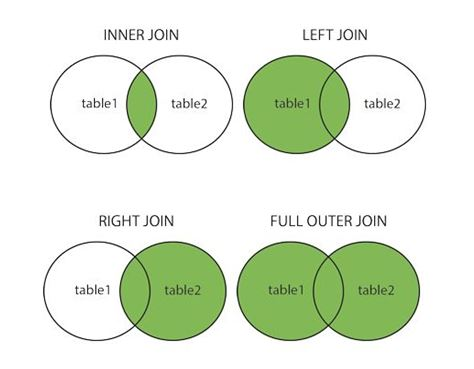

In [240]:
#Criando Tabela 01

#ID do vendedor e Valor de vendas
tab_01 = cursor.execute(
    'CREATE TABLE Tab_Vendas (id real, valor real)'
)

conexao.commit()

In [241]:
#Criando Tabela 02

#Dados cadastrais
tab_02 = cursor.execute(
    'CREATE TABLE Tab_Cadastro_Vendedor (id real, Nome text)'
)

conexao.commit()

In [242]:
#Inserindo valores na tabela de vendas (id_vendedor, valor de vendas)

#Vendedor 01
cursor.execute('INSERT INTO Tab_Vendas VALUES (1,100)')
cursor.execute('INSERT INTO Tab_Vendas VALUES (1,200)')
cursor.execute('INSERT INTO Tab_Vendas VALUES (1,150)')

#Vendedor 02
cursor.execute('INSERT INTO Tab_Vendas VALUES (2,50)')
cursor.execute('INSERT INTO Tab_Vendas VALUES (2,200)')
cursor.execute('INSERT INTO Tab_Vendas VALUES (2,900)')

#Vendedor 03
cursor.execute('INSERT INTO Tab_Vendas VALUES (3,900)')

In [243]:
#Inserindo valores na tabela de cadastro (id_vendedor, Nome)

cursor.execute('INSERT INTO Tab_Cadastro_Vendedor VALUES (1,"André")')
cursor.execute('INSERT INTO Tab_Cadastro_Vendedor VALUES (2,"Rosana")')

In [244]:
#Consultar a tabela

consulta = cursor.execute(
    'SELECT*FROM Tab_Vendas'
).fetchall()

for linha in consulta:
  print(linha)

(1.0, 100.0)
(1.0, 200.0)
(1.0, 150.0)
(2.0, 50.0)
(2.0, 200.0)
(2.0, 900.0)
(3.0, 900.0)


In [245]:
consulta = cursor.execute(
    'SELECT*FROM Tab_Cadastro_Vendedor'
).fetchall()

for linha in consulta:
  print(linha)

(1.0, 'André')
(2.0, 'Rosana')


**Inner Join (Interseção)**

In [246]:
consulta = cursor.execute(
    'SELECT*FROM Tab_Vendas INNER JOIN Tab_Cadastro_Vendedor ON Tab_Vendas.id = Tab_Cadastro_Vendedor.id'
).fetchall()

for linha in consulta:
  print(linha)

(1.0, 100.0, 1.0, 'André')
(1.0, 200.0, 1.0, 'André')
(1.0, 150.0, 1.0, 'André')
(2.0, 50.0, 2.0, 'Rosana')
(2.0, 200.0, 2.0, 'Rosana')
(2.0, 900.0, 2.0, 'Rosana')


**Left Join**

In [247]:
consulta = cursor.execute(
    'SELECT*FROM Tab_Vendas LEFT JOIN Tab_Cadastro_Vendedor ON Tab_Vendas.id = Tab_Cadastro_Vendedor.id'
).fetchall()

for linha in consulta:
  print(linha)

(1.0, 100.0, 1.0, 'André')
(1.0, 200.0, 1.0, 'André')
(1.0, 150.0, 1.0, 'André')
(2.0, 50.0, 2.0, 'Rosana')
(2.0, 200.0, 2.0, 'Rosana')
(2.0, 900.0, 2.0, 'Rosana')
(3.0, 900.0, None, None)


# UNION (unir tabelas)

In [248]:
#Criando a tabela 
cursor.execute('CREATE TABLE Tabela_X (id real, Nome text)')
conexao.commit()

cursor.execute('CREATE TABLE Tabela_Y (id real, Nome text)')
conexao.commit()

In [249]:
#Inserir valores
cursor.execute('INSERT INTO Tabela_X VALUES (1, "André")')
cursor.execute('INSERT INTO Tabela_X VALUES (1, "Rosana")')
cursor.execute('INSERT INTO Tabela_X VALUES (3, "João")')

cursor.execute('INSERT INTO Tabela_Y VALUES (1, "Maria")')
cursor.execute('INSERT INTO Tabela_Y VALUES (1, "Ana")')
cursor.execute('INSERT INTO Tabela_Y VALUES (3, "Joaquim")')

In [250]:
# Consultar tabela
consulta1 = cursor.execute(
    'SELECT*FROM Tabela_X'
).fetchall()

#for linha in consulta:
print(consulta1)

[(1.0, 'André'), (1.0, 'Rosana'), (3.0, 'João')]


In [251]:
consulta2 = cursor.execute(
    'SELECT*FROM Tabela_Y'
).fetchall()

#for linha in consulta:
print(consulta2)

[(1.0, 'Maria'), (1.0, 'Ana'), (3.0, 'Joaquim')]


In [252]:
consulta_unida = cursor.execute(
    'SELECT*FROM Tabela_X UNION ALL SELECT*FROM Tabela_Y'
).fetchall()

for linha in consulta_unida:
  print(linha)

(1.0, 'André')
(1.0, 'Rosana')
(3.0, 'João')
(1.0, 'Maria')
(1.0, 'Ana')
(3.0, 'Joaquim')


# Group BY

* Agrupa linhas que tem os mesmos valores em linhas de resumo.

In [253]:
consulta_unida = cursor.execute(
    'SELECT*FROM Minha_Tabela'
).fetchall()

for linha in consulta_unida:
  print(linha)

('05/01/2022', 'Rosana', 37.0)
('06/01/2022', 'Ana', 10.0)
('06/01/2022', 'Antônia', 16.0)
('08/01/2022', 'Ana', 42.0)
('06/01/2022', 'Ana', 25.0)
('10/06/2022', 'Renata', 35.0)
('07/06/2022', 'Gilton', 50.0)


In [254]:
consulta_agrupada = cursor.execute(
    'SELECT SUM (Idade) FROM Minha_Tabela GROUP BY Nome'
).fetchall()

for linha in consulta_agrupada:
  print(linha)

(77.0,)
(16.0,)
(50.0,)
(35.0,)
(37.0,)


In [255]:
consulta_agrupada = cursor.execute(
    'SELECT COUNT (Idade) FROM Minha_Tabela GROUP BY Nome'
).fetchall()

for linha in consulta_agrupada:
  print(linha)

(3,)
(1,)
(1,)
(1,)
(1,)


In [256]:
consulta_agrupada = cursor.execute(
    'SELECT MAX (Idade) FROM Minha_Tabela GROUP BY Nome'
).fetchall()

for linha in consulta_agrupada:
  print(linha)

(42.0,)
(16.0,)
(50.0,)
(35.0,)
(37.0,)


In [257]:
consulta_agrupada = cursor.execute(
    'SELECT AVG (Idade) FROM Minha_Tabela WHERE Nome = "Ana" GROUP BY Nome'
).fetchall()

for linha in consulta_agrupada:
  print(linha)

(25.666666666666668,)
